In [ ]:
# colab 환경에서 github 데이터셋 사용하기 
!wget https://github.com/rickiepark/deep-learning-with-python-notebooks/archive/master.zip
!unzip master.zip
!mv deep-learning-with-python-notebooks-master/datasets ./

--2022-01-19 09:39:33--  https://github.com/rickiepark/deep-learning-with-python-notebooks/archive/master.zip
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/rickiepark/deep-learning-with-python-notebooks/zip/master [following]
--2022-01-19 09:39:34--  https://codeload.github.com/rickiepark/deep-learning-with-python-notebooks/zip/master
Resolving codeload.github.com (codeload.github.com)... 52.193.111.178
Connecting to codeload.github.com (codeload.github.com)|52.193.111.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip.2’

master.zip.2            [      <=>           ] 169.67M  14.1MB/s               ^C
Archive:  master.zip
c7870901e7f7715065d871b063f65c69ed6a1c63
replace deep-learning-with-python-notebooks-master/.gitignore? [y]es, [n]o, [A]ll, [N

### 3.1 신경망의 구조
- 네트워크(또는 모델)를 구성하는 `층`
- `입력 데이터`와 그에 상응하는 `타깃`
- 학습에 사용할 피드백 신호를 정의하는 `손실 함수`
- 학습 진행 방식을 결정하는 `옵티마이저`

연속된 층으로 구성된 네트워크가 입력 데이터를 예측으로 매핑하고, 손실함수는 예측과 타깃을 비교하여 손실 값을 만든 뒤, 옵티마이저는 손실 값을 사용하여 네트워크의 가중치를 업데이트한다.

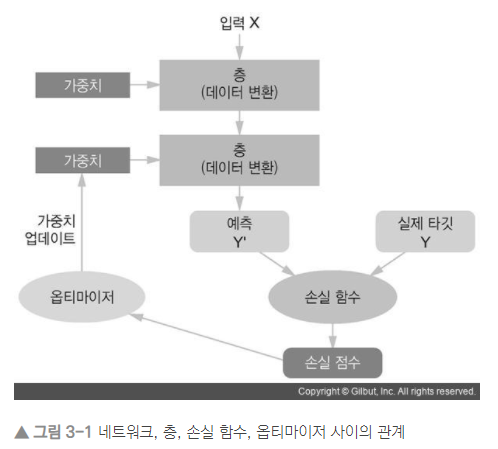

#### 3.1.1 층: 딥러닝의 구성 단위
- 층: 하나 이상의 텐서를 입력으로 받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈
- 가중치: 층의 상채, 확률적 경사 하강법에 의해 학습되는 하나 이상의 텐서, 네트워크가 학습한 지식이 담겨있음.
- 층마다 적절한 텐서 포맷과 데이터 처리 방식이 다르다. 
  - 2D 텐서 : `완전 연결 층(fully connected layer)`이나 `밀집층(dense layer)`, `밀집연결층(densely connected layer)`에 의해 처리되는 경우가 많음.
  - 3D 텐서(시퀀스 데이터) : LSTM 같은 `순환 층(recurrent layer)`에 의해 처리됨.
  - 4D 텐서(이미지 데이터) : `2D 합성곱 층(convolution layer)`에 의해 처리됨.


- 케라스에서느 호환 가능한 층들을 엮어 데이터 변환 파이프라인을 구성함. 
  - `층 호환성(layer compatilbility)` : 각 층이 특정 크기의 입력 텐서만 받고 특정 크기의 출력 텐서를 반환한다.

```
from keras import layers
layer = layers.Dense(32, inut_shape(784,) # 32개의 유닛으로 된 밀집 층
```

이 층은 첫 번째 차원이 784인 2D 텐서를 입력으로 받고, 첫 번째 차원 크기가 32로 변환된 텐서를 출력한다.

따라서 이 층에는 32차원의 벡터를 입력으로 받는 하위 층이 연결되어야 한다.

```
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, input_shape(784, )))
model.add(layers.Dense(10))

```

케라스에서는 모델에 추가된 층을 자동으로 상위 층의 크기에 맞추어 주기 때문에 호환성을 걱정하지 않아도 된다. 위의 코드에서 두 번째 층은 자동으로 첫 번째 층의 출력 크기를 입력 크기로 자동 채택한다.

#### 3.1.2 모델: 층의 네트워크
- 딥러닝 모델은 층으로 만든 비순환 유향 그래프(Directed Acyclic Graph, DAG)이다.
- 머신러닝 : 가능성 있는 공간을 사전에 정의하고 피드백 신호의 도움을 받아 입력 데이터에 대한 유용한 변환을 찾는 것.
- 네트워크 구조는 `가설 공간(hypothesis space)`을 정의한다. 네트워크 구조를 선택함으로써 가능성 있는 공간(가설 공간)을 일련의 특정 텐서 연산으로 제한 하는 것. 
- 최적화 대상 : 텐서 연산에 포함된 가중치 텐서의 좋은 값

#### 3.1.3 손실 함수와 옵티마이저: 학습 과정을 조절하는 열쇠
- `손실 함수(loss function)(목적함수(objective function)` : 훈련하는 동안 최소화할 값
- `옵티마이저(optimizer)` : 네트워크가 어떻게 업데이트될 지 결정. 특정 종류의 확률적 경사 하강법(SGD)을 구현


- 여러 개의 출력을 내는 신경망은 여러 개의 손실 함수를 가질 수 있다.(출력 당 한 개) 하지만 경사 하강법 과정은 하나의 스칼라 손실값을 기준으로 하기 때문에 손실 이 여러 개인 네트워크에서는 모든 손실이 하나의 스칼라 양으로 합쳐진다(평균)
- 올바른 목적 함수를 선택하는 것이 중요
  - 이진 클래스 분류 문제 : 이진 크로스엔트로피(binary crossentropy)
  - 다중 클래스 분류 문제 : 범주형 크로스엔트로피(categorical crossentropy)
  - 회귀 문제 : 평균 제곱 오차
  - 시퀀스 학습 문제 : CTC
  - 완전히 새로운 연구를 할 때는 독자적인 목적 함수를 만들게 된다.

### 3.2 케라스 소개

#### 3.2.1 케라스, 텐서플로, 씨아노, CNTK

#### 3.2.2 케라스를 사용한 개발 : 빠르게 둘러보기

- 전형적인 케라스의 작업 흐름
  1. 입력 텐서와 타깃 텐서로 이루어진 훈련 데이터를 정의한다.
  2. 입력과 타킷을 매핑하는 층으로 이루어진 네트워크(또는 모델)를 정의한다.
  3. 손실 함수, 옵티마이저, 모니터링을 위한 측정 지표를 선택하여 학습 과정을 설정한다.
  4. 훈련 데이터에 대해 모델의 fit() 메서드를 반복적으로 호출한다.

- 모델 정의 방법
  1. Sequential 클래스 : 층을 순서대로 쌓아 올린 네트워크
  ```
  from keras import models
  from keras import layers
  model = models.Sequential()
  model.add(layers.Dense(32, activation = 'relu', input_shape = (784, )))
  model.add(layers.Dense(10, activation = 'softmax'))
  ```
  2. 함수형 API : 완전히 임의의 구조를 만들 수 있는 비순환 유향 그래프
  ```
  input_tensor = layers.Input(shape = (784,))
  x = layers.Dense(32, activation = 'relu')(input_tenser)
  output_tenseo = layers.Dense(10, activation = 'softmax')(x)
  model = models.Model(inputs = input_tensor, outputs = output_tensor)
  ```

  - 모델 구조가 정의된 후에는 1, 2 방법 모두 상관없다.

- 컴파일 : 학습 과정 설정
  - 옵티마이저, 손실 함수, 측정 지표를 지정

  ```
  from keras import optimizers

  model.compile(optimizer = optimizer.RMSprop(lr = 0.001),
                loss = 'mse',
                metrics = ['accuracy'])
  
  ```

- 학습
```
model.fit(input_tensor, target_tensor, batch_size = 128, epochs = 10
```

### 3.4 영화 리뷰 분류: 이진 분류 예제


#### 3.4.1 IMDB 데이터셋 (이진 분류)
- 인터넷 영화 데이터베이스, 리뷰 데이터
- 훈련데이터 : 2만 5000개, 테스트데이터 : 2만 5000개
- 50% 부정, 50% 긍정
- 전처리된 상태, 각 리뷰(단어 시퀀스)가 숫자 시퀀스로 변환되어 있음.

In [ ]:
# IBDM 데이터셋 로드
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[0] # 첫 번째 데이터의 단어 시퀀스

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0] # 첫 번째 데이터의 label (0: 부정, 1: 긍정)

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
# 매핑된 시퀀스 데이터를 원래의 문장으로 변환하는 코드
word_index = imdb.get_word_index()   # 단어와 정수 인덱스를 매핑한 딕셔너리
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()] # 뒤집기
)
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]]) # (0:패딩, 1: 문서 시작, 2: 사전에 없음)

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

#### 3.4.2 데이터 준비

신경망에 숫자 리스트를 주입할 수는 없기 때문에 리스트를 텐서로 바꿔주어야 한다. 이렇게 바꾸는 방법은 두 가지가 있다.
  1. 같은 길이가 되도록 리스트에 패딩(padding)을 추가하고 (samples, sequence_length) 크기의 정수 텐서로 변환한다. 그 다음 이 정수 텐서를 다룰 수 잇는 층을 신경망의 첫 번째 층으로 사용한다. (enbedding 층을 말한다.)
  2. 리스트를 원-핫 인코딩(one-hot encoding)하여 0과 1의 벡터로 변환한다. 그 다음 부동 소수 벡터 데이터를 다룰 수 있는 Dense 층을 신경망의 첫 번째 층으로 사용한다.

예시에서는 두 번째 방법을 사용한다.

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension)) #원소가 모두 0인 행렬 생성
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
# 레이블
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

#### 3.4.3 신경망 모델 만들기

- `Dense(16, activation = 'relu')`
  - `은닉 유닛(hidden unit)`
    - 16개의 은닉 유닛이 있다는 것은 가중치 행렬 W의 크기가 (input_dimension, 16)이라는 뜻이다.
    - 입력 데이터와 W를 점곱하면 입력 데이터가 16차원으로 표현된 공간으로 투영된다.
    - 표현 공간의 차원을 '신경망이 내재되 표현을 학습할 때 가질 수 있는 자유도'로 이해할 수 있다.
    - 은닉 유닛을 늘리면 (표현 공간을 더 고차원으로 만들면) 신경망이 더욱 복잡한 표현을 학습할 수 있지만 계산 비용이 커지고 원하지 않는 패턴을 학습할 수도 있다. 

- Dense층을 쌓을 때 두 가지 중요한 구조상의 결정이 필요하다. (4장)
  1. 얼마나 많은 층을 사용할 것인가?
  2. 각 층에 얼마나 많은 은닉 유닛을 둘 것인가?

- 3장에서 사용할 구조
  - 16개의 은닉 유닛을 가진 2개의 은닉 층
  - 현재 리뷰이 감정을 스칼라 값의 예측으로 출력하는 세 번째 층

- `relu 함수` : 음수를 0으로 만드는 함수
- `시그모이드 함수` : 임의의 값을 [0,1] 사이로 압축



##### 활성화 함수
- 활성화 함수(또는 비선형성(non-linearity)이라고 부른다)가 없다면 Dense층은 선형적인 연산인 점곱과 덧셈 2개로 구성된다.

- 그러므로 이 층은 입력에 대한 선형 변환(아핀 변환)만을 학습할 수 있다. 이 층의 가설 공간은 입력 데이터를 16차원의 공간으로 바꾸는 가능한 모든 선형 변환의 집합이다. 이런 가설 공간은 제약이 매우 많으며, 선형 층을 여러겹 쌓아도 여전히 하나의 선형 연산이기 때문에 층을 여러 개로 구성하는 장점이 없다. 즉 층을 추가해도 가설 공간이 확장되지 않는다.

- 가설 공간을 풍부하게 만들어 층을 깊게 만드는 장점을 살리기 위해 비선형성 또는 활성화 함수를 추가해야 한다.


In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
# 모델 컴파일하기
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# 옵티마이저 설정하기
from tensorflow.keras import optimizers
from tensorflow.keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
# 손실과 측정을 함수 객체로 지정하기
from tensorflow.keras import losses

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


#### 3.4.4 훈련 검증

In [ ]:
# 훈련, 검증 데이터 분할
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

모델을 512개의 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련시킨다. 동시에 떼어 놓은 10000개의 샘플에서 손실과 정확도를 측정한다.

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 60ms/step - loss: 0.5271 - acc: 0.7833 - val_loss: 0.4064 - val_acc: 0.8576
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3196 - acc: 0.9002 - val_loss: 0.3170 - val_acc: 0.8825
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2348 - acc: 0.9249 - val_loss: 0.2828 - val_acc: 0.8905
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1837 - acc: 0.9433 - val_loss: 0.3048 - val_acc: 0.8777
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1497 - acc: 0.9526 - val_loss: 0.2841 - val_acc: 0.8873
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1242 - acc: 0.9623 - val_loss: 0.2925 - val_acc: 0.8831
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1027 - acc: 0.9697 - val_loss: 0.3041 - val_acc: 0.8851
Epoch 8/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0871 - a

model.fit() 메서드는 `History` 객체를 반환한다. 이 객체는 훈련하는 동안 발생한 모든 정보를 담고있는 딕셔너리인 history 속성을 가진다.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

과대적합(overfitting)

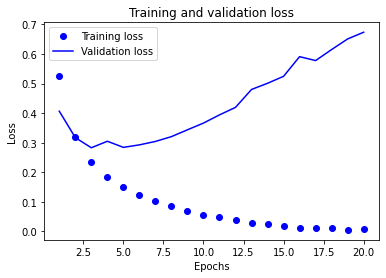

In [ ]:
# 훈련, 검증데이터의 손실 그래프
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

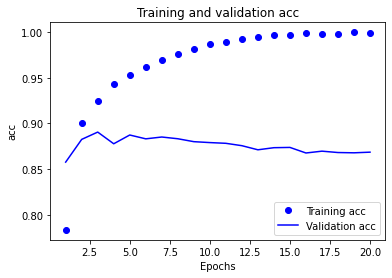

In [ ]:
# 훈련, 검증데이터의 정확도 그래프
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

In [ ]:
# 4번의 epoch를 가진 모델 생성
# fit()메서드를 재호출하면 학습된 가중치에서 훈려이 이어지므로 처음부터 다시 학습하려면 모델 객체를 새로 만들어야 한다.
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.4603 - accuracy: 0.8157
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2614 - accuracy: 0.9096
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2027 - accuracy: 0.9287
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2915 - accuracy: 0.8834


In [ ]:
results

[0.29153427481651306, 0.8834400177001953]

#### 3.4.5 훈련된 모델로 새로운 데이터에 대해 예측하기

In [ ]:
model.predict(x_test)

array([[0.19370008],
       [0.9992657 ],
       [0.72470844],
       ...,
       [0.12093756],
       [0.0538241 ],
       [0.527048  ]], dtype=float32)

### 3.5 뉴스 기사 분류: 다중 분류 문제
- 다중 분류
  - `단일 레이블 다중 분류(single-lable, multiclass classification)`: 하나의 범주를 가짐.
  - `다중 레이블 다중 분류(multi-label, multicalss classification)` : 여러 개의 범주를 가짐. ex) 토픽

#### 3.5.1 로이터 데이터셋
- 짧은 뉴스 기사와 토픽의 집합, 46개의 토픽이 존재하며 각 토픽은 훈련세트에 최소 10개의 샘플을 가지고 있다.

In [ ]:
# 로이터 데이터셋 로드하기
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000) #10000개의 단어로 단어 제한

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:
len(train_data)

8982

In [ ]:
len(train_labels)

8982

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [ ]:
# 디코딩
word_index = reuters.get_word_index()
reverse_word_index = dict([value, key] for (key, value) in word_index.items())
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [ ]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

#### 3.5.2 데이터 준비

In [ ]:
# 데이터 인코딩
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

라벨을 벡터로 변경해 주어야 한다. 레이블의 리스트를 정수형 텐서로 변환하는 것과 원-핫 인코딩 방식이 있다.

```
def to_one_hot(labels, dimension = 46):
  results = np.zeros((len(labels), demention))
  for i, label in enumeratie(labels):
    results[i, label] = 1.
  return results
```

```
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
```

In [ ]:
# label 변경
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

#### 3.5.3 모델 구성

- 출력 클래스의 개수가 46개이다.
- `정보의 병목(information bottleneck)`
  - Dense 층을 쌓으면 각 층은 이전 층의 출력에서 제공한 정보만 사용할 수 있다.
  - 한 층이 분류 문제에 필요한 일부 정보를 누락하면 그 다음 층에서 이를 복원할 수 없다.
  - 즉, 각 층은 잠재적으로 정보의 병목이 될 수 있다.
  - 이전에 사용한 16차원의 공간은 46개의 클래스를 구분하기에 제약이 많으니 64개로 늘려 모델을 구성한다.
- softmax 활성화 함수
  - 각 입력 샘플마다 46개의 출력 클래스에 대한 확률 분포를 출력한다. output[i]는 어떤 샘플이 클래스 i에 속할 확률이다.
- 손실함수 : categorical_crossentropy
  - 두 확률 분포 사이의 거리를 측정, 네트워크가 출력한 확률 분포와 진짜 레이블의 분포 사이의 거리

In [ ]:
# 모델 정의
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
# 모델 컴파일하기
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

#### 3.5.4 훈련검증

In [ ]:
# 검증 세트 준비
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
# 모델 훈련 (epochs = 20)
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))


Epoch 1/20
16/16 [==============================] - 2s 63ms/step - loss: 2.5293 - accuracy: 0.5296 - val_loss: 1.6644 - val_accuracy: 0.6600
Epoch 2/20
16/16 [==============================] - 1s 42ms/step - loss: 1.3809 - accuracy: 0.7131 - val_loss: 1.2809 - val_accuracy: 0.7220
Epoch 3/20
16/16 [==============================] - 1s 42ms/step - loss: 1.0313 - accuracy: 0.7828 - val_loss: 1.1104 - val_accuracy: 0.7530
Epoch 4/20
16/16 [==============================] - 1s 42ms/step - loss: 0.8062 - accuracy: 0.8240 - val_loss: 1.0216 - val_accuracy: 0.7790
Epoch 5/20
16/16 [==============================] - 1s 42ms/step - loss: 0.6432 - accuracy: 0.8614 - val_loss: 0.9598 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 1s 42ms/step - loss: 0.5137 - accuracy: 0.8908 - val_loss: 0.9386 - val_accuracy: 0.7910
Epoch 7/20
16/16 [==============================] - 1s 41ms/step - loss: 0.4172 - accuracy: 0.9110 - val_loss: 0.9001 - val_accuracy: 0.8100
Epoch 8/20
16

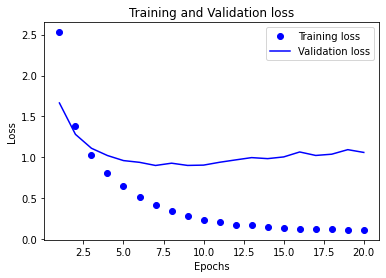

In [ ]:
# 훈련, 검증데이터 손실
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

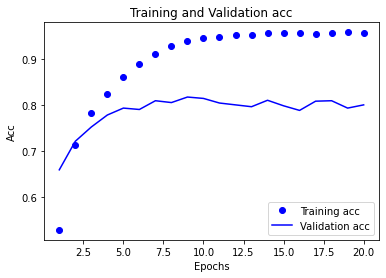

In [ ]:
# 훈련, 검증데이터 정확도
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [ ]:
# 모델을 처음부터 다시 훈련하기 (epochs = 9)
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs = 9,
          batch_size = 512,
          validation_data = (x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 53ms/step - loss: 2.5250 - accuracy: 0.5410 - val_loss: 1.6766 - val_accuracy: 0.6570
Epoch 2/9
16/16 [==============================] - 1s 43ms/step - loss: 1.3601 - accuracy: 0.7116 - val_loss: 1.2584 - val_accuracy: 0.7220
Epoch 3/9
16/16 [==============================] - 1s 42ms/step - loss: 1.0165 - accuracy: 0.7821 - val_loss: 1.1024 - val_accuracy: 0.7500
Epoch 4/9
16/16 [==============================] - 1s 42ms/step - loss: 0.8074 - accuracy: 0.8242 - val_loss: 1.0086 - val_accuracy: 0.7830
Epoch 5/9
16/16 [==============================] - 1s 43ms/step - loss: 0.6435 - accuracy: 0.8588 - val_loss: 0.9464 - val_accuracy: 0.8090
Epoch 6/9
16/16 [==============================] - 1s 41ms/step - loss: 0.5156 - accuracy: 0.8895 - val_loss: 0.9445 - val_accuracy: 0.7990
Epoch 7/9
16/16 [==============================] - 1s 42ms/step - loss: 0.4174 - accuracy: 0.9119 - val_loss: 0.9432 - val_accuracy: 0.8010
Epoch 8/9
16/16 [===

In [ ]:
results

[0.9866583347320557, 0.7920747995376587]

In [ ]:
# 새로운 데이터를 예측하기
predictions = model.predict(x_test)
predictions

array([[1.8221761e-05, 2.8739573e-04, 5.8282421e-06, ..., 2.1340782e-06,
        9.4918450e-06, 1.5687121e-07],
       [2.6691572e-03, 2.8852291e-02, 1.7670044e-03, ..., 4.3221626e-05,
        7.5916302e-07, 8.3867210e-04],
       [1.3891119e-02, 7.3495477e-01, 7.0997016e-03, ..., 3.1653978e-04,
        1.5775925e-04, 3.6828201e-03],
       ...,
       [7.7442717e-05, 3.6539810e-04, 2.2193912e-05, ..., 4.7920812e-06,
        6.7432622e-05, 9.1044367e-06],
       [7.4233036e-03, 1.1151502e-01, 4.2069899e-03, ..., 1.3106677e-03,
        1.8850419e-03, 8.6416339e-04],
       [4.8226741e-04, 3.5538754e-01, 3.1095412e-02, ..., 2.0029186e-04,
        4.8332271e-04, 2.4898309e-04]], dtype=float32)

#### 3.5.6 레이블과 손실을 다루는 다른 방법
- 레이블을 정수 텐서로 변화하는 경우 손실 함수를 `sparse_categorical_crossentropy`를 사용하면 된다. 수학적으로 동일.

```
y_train = np.array(train_data)
y_test = np.array(test_labels)

model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
```

#### 3.5.7 충분히 큰 중간층을 두어야 하는 이유

마지막 출력이 46차원이기 때문에 중간층의 히든 유닛이 46개보다 적어서는 안 된다. 이렇게 되면 정보의 손실이 발생한다. 이런 손실의 원인 대부분은 클래스 46개의 분할 초평면을 복원하기에 충분한 정보를 중간층의 저차원 표현 공간으로 압축하려 했기 때문이다.

In [ ]:
# 정보 병목이 있는 모델
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs = 20,
          batch_size = 128,
          validation_data = (x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/20
63/63 [==============================] - 2s 18ms/step - loss: 3.0324 - accuracy: 0.1904 - val_loss: 2.3844 - val_accuracy: 0.4050
Epoch 2/20
63/63 [==============================] - 1s 15ms/step - loss: 2.1031 - accuracy: 0.4281 - val_loss: 1.9407 - val_accuracy: 0.4360
Epoch 3/20
63/63 [==============================] - 1s 15ms/step - loss: 1.8297 - accuracy: 0.4432 - val_loss: 1.8186 - val_accuracy: 0.4630
Epoch 4/20
63/63 [==============================] - 1s 14ms/step - loss: 1.6516 - accuracy: 0.5752 - val_loss: 1.6868 - val_accuracy: 0.6510
Epoch 5/20
63/63 [==============================] - 1s 15ms/step - loss: 1.5158 - accuracy: 0.6511 - val_loss: 1.6293 - val_accuracy: 0.6330
Epoch 6/20
63/63 [==============================] - 1s 15ms/step - loss: 1.4346 - accuracy: 0.6679 - val_loss: 1.6055 - val_accuracy: 0.6520
Epoch 7/20
63/63 [==============================] - 1s 14ms/step - loss: 1.3717 - accuracy: 0.6750 - val_loss: 1.6346 - val_accuracy: 0.6490
Epoch 8/20
63

In [ ]:
results

[2.1321589946746826, 0.62199467420578]

### 주택 가격 예측 : 회귀문제
- 회귀 : 연속적인 값을 예측

#### 3.6.1 보스턴 주택 가격 데이터셋

In [1]:
# 보스턴 주택 데이터셋 로드하기
from keras.datasets import boston_housing

(train_data , train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

#### 3.6.2 데이터 준비


상이한 스케일을 가진 값을 신경망에 주입하면 문제가 된다. 네트워크가 이런 다양한 데이터에 자동으로 맞추려하지만 학습을 더 어렵게 만든다. 특성의 스케일이 다르면 전역 최소 점을 찾아가는 경사 하강법의 경로가 스케일이 큰 특성에 영향을 많이 받게 된다. 이런 데이터를 다룰 때 대표적인 방법은 특성별로 정규화를 하는 것이다.

In [4]:
# 데이터 정규화하기
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std

test_data -= mean
test_data /= std

#### 3.6.3 모델 구성

In [5]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)))
  model.add(layers.Dense(64, activation = 'relu'))
  model.add(layers.Dense(1)) # 선형층
  model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
  return model

#### 3.6.4 K-겹 검증을 사용한 훈련 검증
- 검증 세트의 분할에 따라 검증 점수의 분산이 높다. 이렇게 되면 신뢰 있는 모델 평가를 할 수 없다.
- `K-겹 교차 검증(K-fold cross-validation)`
  - 데이터를 K개의 분할로 나누고 K개의 모델을 만들어 K-1 개의 분할에서 훈련하고 나머지 분할에서 평가하는 방법이다. 검증 검수는 K개의 검증 점수의 평균이 된다. 

In [6]:
# K-겹 검증하기
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print('처리중인 폴드 # ', i)
  val_data = train_data[i * num_val_samples: (i+1)*num_val_samples]
  val_target = train_targets[i * num_val_samples: (i+1)*num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples], 
       train_data[(i+1)*num_val_samples:]],
      axis=0)
  partial_train_targets = np.concatenate(
      [train_targets[:i*num_val_samples], 
       train_targets[(i+1)*num_val_samples:]],
      axis=0)
  
  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
            epochs = num_epochs, batch_size = 1, verbose = 0)
  val_mse, val_mae = model.evaluate(val_data, val_target, verbose = 0)
  all_scores.append(val_mae)

처리중인 폴드 #  0
처리중인 폴드 #  1
처리중인 폴드 #  2
처리중인 폴드 #  3


In [7]:
all_scores # 편차가 심하다

[2.02953839302063, 2.2376153469085693, 2.6863200664520264, 2.3491246700286865]

In [8]:
np.mean(all_scores)

2.325649619102478

In [12]:
# 각 폴드에서 검증 점수를 로그에 저장하기
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print('처리중인 폴드 # ', i)
  val_data = train_data[i * num_val_samples: (i+1)*num_val_samples]
  val_target = train_targets[i * num_val_samples: (i+1)*num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples], 
       train_data[(i+1)*num_val_samples:]],
      axis=0)
  partial_train_targets = np.concatenate(
      [train_targets[:i*num_val_samples], 
       train_targets[(i+1)*num_val_samples:]],
      axis=0)
  
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
                      validation_data = (val_data, val_target),
                      epochs = num_epochs, batch_size = 1, verbose = 0)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

처리중인 폴드 #  0
처리중인 폴드 #  1
처리중인 폴드 #  2
처리중인 폴드 #  3


In [13]:
 history.history

{'loss': [189.77615356445312,
  27.662229537963867,
  19.365434646606445,
  16.18589210510254,
  14.165546417236328,
  13.43033504486084,
  12.178598403930664,
  11.913993835449219,
  11.095221519470215,
  10.642294883728027,
  10.12387466430664,
  8.938932418823242,
  9.978850364685059,
  8.926960945129395,
  9.284045219421387,
  9.09537124633789,
  8.470897674560547,
  8.219978332519531,
  8.234440803527832,
  8.411680221557617,
  8.511637687683105,
  8.319008827209473,
  7.887109756469727,
  8.031647682189941,
  7.882399082183838,
  7.871153354644775,
  7.784777641296387,
  7.180363655090332,
  7.385591506958008,
  7.181628704071045,
  6.857585430145264,
  7.014543533325195,
  6.782304763793945,
  6.826500415802002,
  6.905668258666992,
  6.717352390289307,
  6.7881083488464355,
  6.46677303314209,
  6.529256820678711,
  6.825189590454102,
  6.4397358894348145,
  6.618180274963379,
  6.396404266357422,
  5.940362453460693,
  6.574131965637207,
  6.576315402984619,
  6.16975164413452

In [14]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

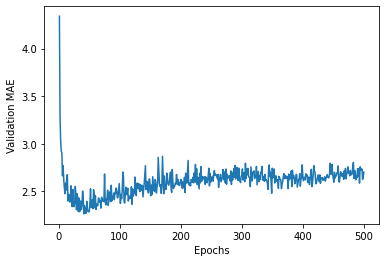

In [15]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

- 곡선의 다른 부분과 스케일이 많이 다른 첫 10개의 데이터 포인트를 제외
- 부드러운 곡선을 얻기 위해 각 포인트를 이전 포인트의 `지수 이동 평균(exponential moving average)`으로 대체

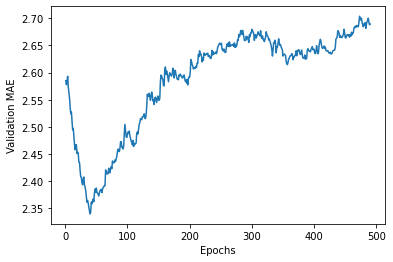

In [19]:
# 처음 10개의 데이터 포인트를 제외한 검증 점수 그리기
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [20]:
# 모든 훈련데이터로 최종 모델 훈련 (Epochs = 80)
model = build_model()
model.fit(train_data, train_targets,
          epochs = 80, batch_size = 16, verbose = 0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 18.3869 - mae: 2.6223


In [21]:
test_mae_score

2.622260093688965

In [26]:
# 모든 훈련데이터로 최종 모델 훈련 (Epochs = 80)
model = build_model()
model.fit(train_data, train_targets,
          epochs = 60, batch_size = 16, verbose = 0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 17.4735 - mae: 2.6266


In [27]:
test_mae_score

2.626614809036255